In [1]:
NH = 1e22
E = 2.0
dust_model = 1
halo_model = 1
SrcRad = 0.0
th = [10,20,30,40,50]

In [2]:
# Last Time
class Dust:
    def __init__(self, name, a_min, a_max, norm, size_func, halo_model, rho, ZDAtype):
        self.name = name
        self.a_min = a_min
        self.a_max = a_max
        self.norm = norm
        self.size_func = size_func
        self.halo_model = halo_model
        self.rho = rho


class Halo:
    import scipy.integrate as integrate
    import numpy as np

    def __init__(self, N_H, E, dusts = None, scatter_model = "RG"):
        self.E = E #AUTUMN: allow for multiple E segments
        self.N_H = N_H
        self.dusts = dusts
        self.scatter_model = scatter_model
        
    #AUTUMN : allow other scatter models
    def dsigma_dOmega(self, a, dust, theta):
        import math
        c = 9.3e-8
        exponent = math.exp(-.4575 * self.E**2 * a**2 * (theta/60)**2)
        F = 1 # AUTUMN: CHANGE 
        return (c * (dust.rho/3)**2 * a**6 * exponent)

    # def dsigma_dOmega(self, a, dust, theta):
    #     import math
    #     c = 9.3e-8
    #     x = .5
    #     exponent = math.exp((-.4575 * self.E**2 * a**2 * (theta/60)**2)/(1-x)**2)
    #     F = 1 # AUTUMN: CHANGE 
    #     return (c * (dust.rho/3)**2 * a**6 * exponent)/(1-x)**2
        
    def I(self, theta):
        I = 0
        for dust in self.dusts:
            I += self.dust_I(dust, theta)
        return I
    
    def dust_I(self, dust, theta):
        import scipy.integrate as integrate
        def integrand(a):
            return dust.size_func(a) * self.dsigma_dOmega(a, dust, theta)
        integration = integrate.quad(integrand, dust.a_min, dust.a_max)
        return self.E * self.N_H * integration[0]

In [31]:
E = 2.0
N_H = 1e22
theta = 10

def simple_size_func(a):
    return a**(-3.5)

silicate = Dust(name = "silicate", a_min=0.0050, a_max=0.250, norm=1, size_func=simple_size_func, halo_model="RG", rho=3.3)
graphite = Dust(name = "graphite", a_min=0.0050, a_max=0.250, norm=1, size_func=simple_size_func, halo_model="RG", rho=2.2)
dusts = [silicate,graphite]

halo = Halo(N_H, E, dusts)

In [32]:
halo.dsigma_dOmega(.1, silicate, 10)

1.1247281178656906e-13

In [33]:
halo.dust_I(silicate, 10)

25067550571962.387

In [34]:
halo.I(10)

36208684159501.23

# shalox Copycat

In [26]:
class Dust:
    def __init__(self, name, a_min, a_max, norm, size_func, halo_model, rho):
        self.name = name
        self.a_min = a_min
        self.a_max = a_max
        self.norm = norm
        self.size_func = size_func
        self.halo_model = halo_model
        self.rho = rho

def shalox(N_H, E, dusts, theta, x):
    import scipy.integrate as integrate
    import math

    def halo_func(a, dust):
        SrPerArcmin2 = 8.4616e-8
        c = 1.1*SrPerArcmin2

        n_a = dust.norm * dust.size_func(a)
        F = 1

        beta1 = E * a * (theta/60) * math.sqrt(.4575)

        I = c * n_a * (dust.rho/3)**2 * a**6 * F * math.exp(-((beta1/(1-x))**2))/((1-x)**2)

        return I

    Isca_calc = 0
    for dust in dusts:
        Isca_calc += integrate.quad(halo_func, dust.a_min, dust.a_max, args=dust)[0]

    Isca = N_H * Isca_calc
    return Isca



In [29]:
def simple_size_func(a):
    return a**(-3.5)

silicate = Dust(name = "silicate", a_min=0.0050, a_max=0.250, norm=1, size_func=simple_size_func, halo_model="RG", rho=3.3)
graphite = Dust(name = "graphite", a_min=0.0050, a_max=0.250, norm=1, size_func=simple_size_func, halo_model="RG", rho=2.2)
dusts = [silicate,graphite]

shalox(1e22, 2, dusts, 30, .5)/shalox(1e22, 2, dusts, 50, .5)

1.1350180461047317

In [1]:
class Halo:
    import scipy.integrate as integrate
    import numpy as np

    def __init__(self, N_H, E, dusts = None, scatter_model = "RG"):
        self.E = E #AUTUMN: allow for multiple E segments
        self.N_H = N_H
        self.dusts = dusts
        self.scatter_model = scatter_model
        
    #AUTUMN : allow other scatter models
    def dsigma_dOmega(self, a, dust, theta):
        import math
        c = 9.3e-8
        exponent = math.exp(-.4575 * self.E**2 * a**2 * (theta/60)**2)
        F = 1 # AUTUMN: CHANGE 
        return (c * (dust.rho/3)**2 * a**6 * exponent)
        
    def I(self, theta):
        I = 0
        for dust in self.dusts:
            I += self.dust_I(dust, theta)
        return I
    
    def dust_I(self, dust, theta):
        import scipy.integrate as integrate
        def integrand(a):
            return dust.size_func(a) * self.dsigma_dOmega(a, dust, theta)
        integration = integrate.quad(integrand, dust.a_min, dust.a_max)
        return self.E * self.N_H * dust.norm * integration[0]

## Demo

In [1]:
from dust import *
from halo import *

E = 2.0
N_H = 1e22
theta = 10

In [2]:
silicate = Silicate()
graphite = Graphite()

In [18]:
graphite.F(E)

np.float64(1.0568899186550977)

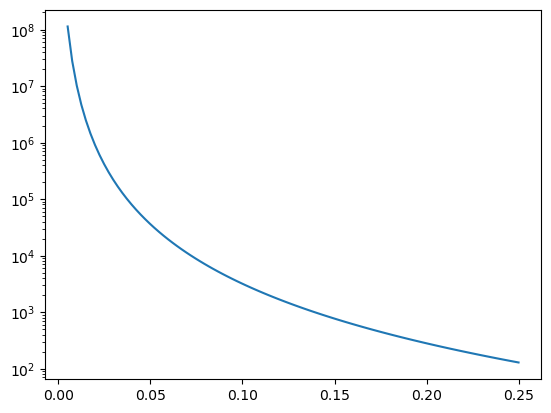

In [4]:
silicate.plot_size_func()

In [5]:
halo = Halo(N_H, E, [silicate,graphite])

In [6]:
halo.dust_I(silicate, 20)

0.020377524283098854

In [7]:
halo.dust_I(graphite, 20)

0.008036214296955146

In [17]:
halo.I(50)

0.009706000728089751

In [9]:
halo.plot_I()

NameError: name 'np' is not defined

## Experimentation

In [ ]:
# Alternate Version
class Dust:
    def __init__(self, name, a_min, a_max, norm, size_func, halo_model, rho):
        self.name = name
        self.a_min = a_min
        self.a_max = a_max
        self.norm = norm
        self.size_func = size_func
        self.halo_model = halo_model
        self.rho = rho


class Halo:
    import scipy.integrate as integrate
    import numpy as np

    def __init__(self, N_H, E, dusts = None, scatter_model = "RG"):
        self.E = E #AUTUMN: allow for multiple E segments
        self.N_H = N_H
        self.dusts = dusts
        self.scatter_model = scatter_model
        
    # AUTUMN : allow other scatter models
    def dsigma_dOmega(self, a, dust, theta):
        import math
        c = 9.3e-8
        exponent = math.exp(-.4575 * self.E**2 * a**2 * (theta/60)**2)
        F = 1 # AUTUMN: CHANGE 
        return (c * (dust.rho/3)**2 * a**6 * exponent)
        
    def I(self, theta):
        I = 0
        for dust in self.dusts:
            I += self.dust_I(dust, theta)
        return I
    
    def dust_I(self, dust, theta):
        import scipy.integrate as integrate
        def z_integrand(z, a):
            return (1-z)**-2 * self.dsigma_dOmega(a, dust, theta)

        def a_integrand(a):
            return dust.size_func(a) * integrate.quad(z_integrand, 0, 1-(theta/60), args=a)[0]

        a_integration = integrate.quad(a_integrand, dust.a_min, dust.a_max)[0]
        return self.E * self.N_H * a_integration

In [ ]:
# mimic shalo
class Dust:
    def __init__(self, name, a_min, a_max, norm, size_func, halo_model, rho):
        self.name = name
        self.a_min = a_min
        self.a_max = a_max
        self.norm = norm
        self.size_func = size_func
        self.halo_model = halo_model
        self.rho = rho


class Halo:
    import scipy.integrate as integrate
    import numpy as np

    def __init__(self, N_H, E, dusts = None, scatter_model = "RG"):
        self.E = E #AUTUMN: allow for multiple E segments
        self.N_H = N_H
        self.dusts = dusts
        self.scatter_model = scatter_model
        
    # AUTUMN : allow other scatter models
    def dsigma_dOmega(self, a, dust, theta):
        import math
        import scipy.integrate as integrate
        c = 9.3e-8
        beta = math.sqrt(.4575) * self.E * a * (theta/60)
        F = 1 # AUTUMN: CHANGE 

        def integrand(t):
            return math.exp(-t**2)

        integration = integrate.quad(integrand, beta, 1000)[0]

        return (c * (dust.rho/3)**2 * a**6 * F * (2/math.pi)/(2*beta) * integration)
        
    def I(self, theta):
        I = 0
        for dust in self.dusts:
            I += self.dust_I(dust, theta)
        return I
    
    def dust_I(self, dust, theta):
        import scipy.integrate as integrate
        def a_integrand(a):
            return dust.size_func(a) * self.dsigma_dOmega(a, dust, theta)
        
        a_integration = integrate.quad(a_integrand, dust.a_min, dust.a_max)[0]
        return self.N_H * a_integration